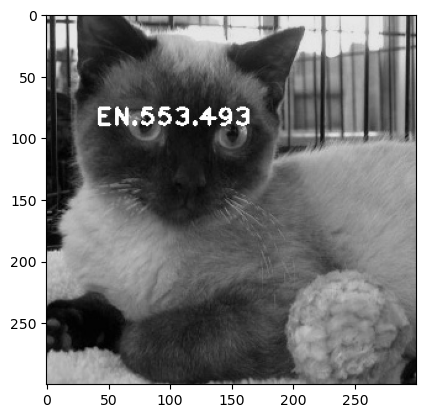

In [2]:
from estimate_watermark import *
from preprocess import *
from image_crawler import *
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/Users/xinmingshen_1/Desktop/test 2/cat.1.jpg')
plt.imshow(img)
plt.show()

In [3]:
ls

NewTrial.ipynb             image_crawler.py
__init__.py                preprocess.py
__pycache__/               tensorflow_experiments.py
closed_form_matting.py     watermark_reconstruct.py
estimate_watermark.py


This script contains a LOT of print statements for debugging, sorry!

In [4]:
from estimate_watermark import * # Reload to check updates of script

gx, gy, gxlist, gylist = estimate_watermark('/Users/xinmingshen_1/Desktop/test 2')
print("Gradients computed.")

Computing gradients.
Number of images processed: 51
Computing median gradients.
Gradients computed.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


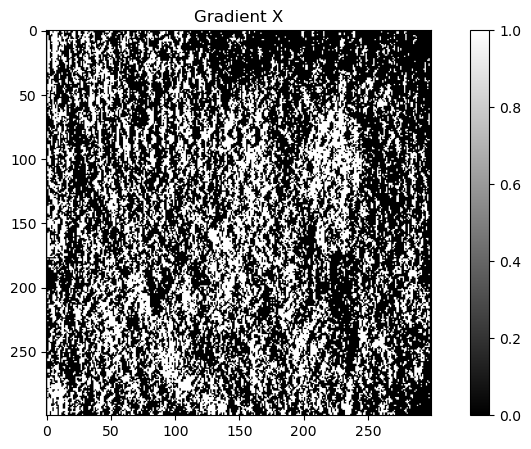

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


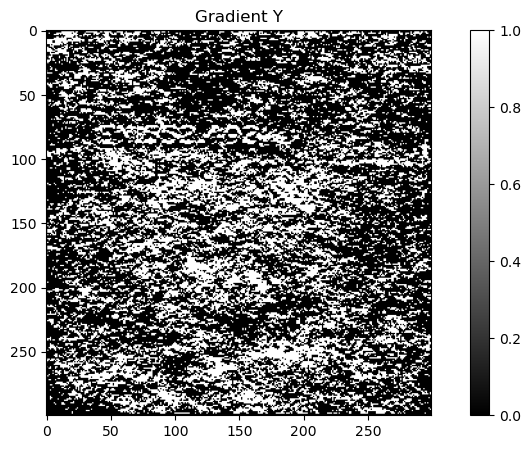

In [5]:
def plot_gradient(grad, title="Gradient"):
    if grad is not None:
        plt.figure(figsize=(10, 5))
        plt.imshow(grad, cmap='gray')
        plt.colorbar()
        plt.title(title)
        plt.show()
    else:
        print("Gradient data is None, cannot plot.")

plot_gradient(gx, "Gradient X")
plot_gradient(gy, "Gradient Y")

In [6]:
def plot_image(image, title):
    if image is not None:
        plt.figure(figsize=(6, 6))
        # Normalize image for better visualization if it's not already normalized
        image = (image - np.min(image)) / (np.max(image) - np.min(image))
        plt.imshow(image, cmap='gray')  # Use cmap='jet' for color maps if needed
        plt.title(title)
        plt.colorbar()
        plt.show()
    else:
        print("No image data to plot.")


In [7]:
est, loss = poisson_reconstruct(gx, gy)
cropped_gx, cropped_gy = crop_watermark(gx, gy)
est2, _ = poisson_reconstruct(cropped_gx, cropped_gy)

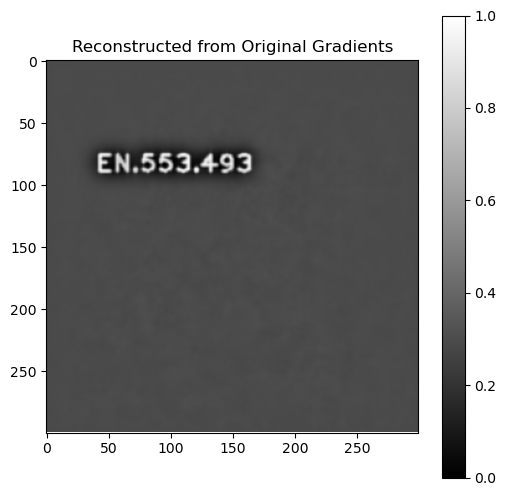

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


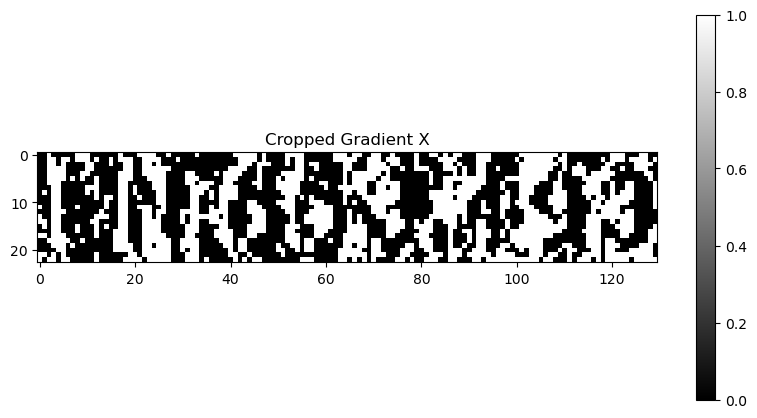

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


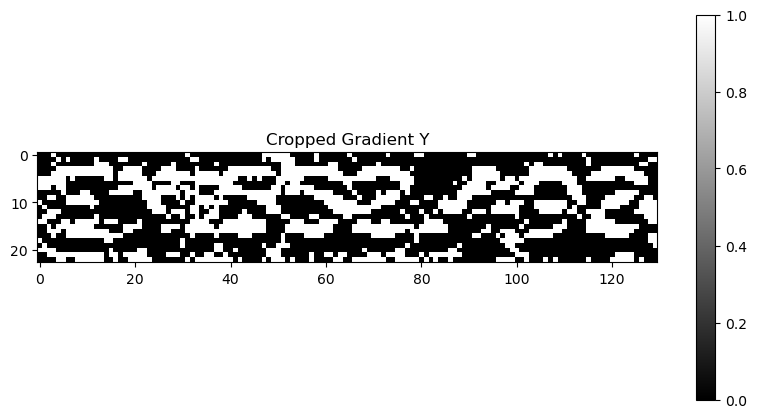

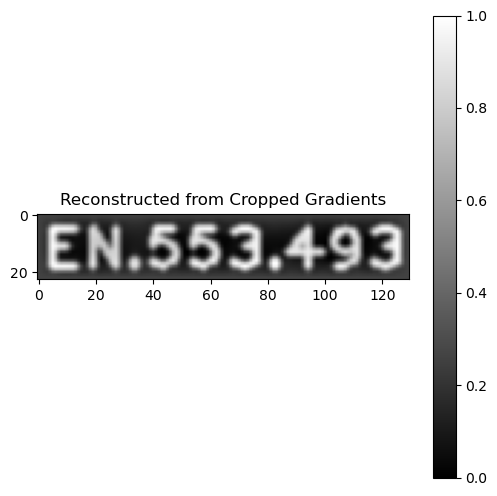

In [8]:
plot_image(est, "Reconstructed from Original Gradients")
# image reconstructed from the original gradients gx and gy
plot_gradient(cropped_gx, "Cropped Gradient X")
plot_gradient(cropped_gy, "Cropped Gradient Y")

plot_image(est2, "Reconstructed from Cropped Gradients")
# reconstructed from cropped_gx and cropped_gy, which are the gradients obtained after cropping the original gradients

In [17]:
img = cv2.imread('/Users/xinmingshen_1/Desktop/test 2/cat.1.jpg')
im, start, end = watermark_detector(img, cropped_gx, cropped_gy)

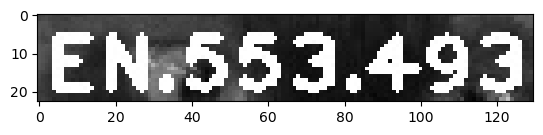

In [18]:
plt.imshow(img[start[0]:(start[0]+end[0]), start[1]:(start[1]+end[1]), :])

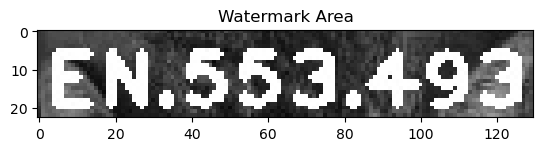

In [20]:
img_path = '/Users/xinmingshen_1/Desktop/test 2/cat.2.jpg'
img = cv2.imread(img_path)

_, start, end = watermark_detector(img, cropped_gx, cropped_gy)
watermark = img[start[0]:start[0]+end[0], start[1]:start[1]+end[1], :]

plt.imshow(cv2.cvtColor(watermark, cv2.COLOR_BGR2RGB))
plt.title('Watermark Area')
plt.show()

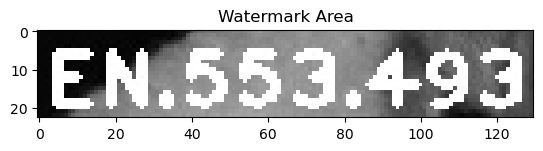

In [21]:
img_path = '/Users/xinmingshen_1/Desktop/test 2/cat.3.jpg'
img = cv2.imread(img_path)

_, start, end = watermark_detector(img, cropped_gx, cropped_gy)
watermark = img[start[0]:start[0]+end[0], start[1]:start[1]+end[1], :]

plt.imshow(cv2.cvtColor(watermark, cv2.COLOR_BGR2RGB))
plt.title('Watermark Area')
plt.show()

In [ ]:
# Was thinking about looping it but meh not dealing with ames stuff again...
watermarks = []

# Iterate over all images to extract watermarks
for img_path in gxlist:
    img = cv2.imread('/Users/xinmingshen_1/Desktop/test 2') # how to represent path
    _, start, end = watermark_detector(img, cropped_gx, cropped_gy)
    watermark = img[start[0]:start[0]+end[0], start[1]:start[1]+end[1], :]
    watermarks.append(watermark)

# Debug
num_watermarks = len(watermarks)
print(f"Number of watermarks extracted: {num_watermarks}")

N = 4
random_indices = np.random.randint(num_watermarks, size=(N*N,))
fig, axes = plt.subplots(N, N, figsize=(12, 8))

for i, val in enumerate(random_indices):
    row = i // N
    col = i % N   
    axes[row, col].imshow(cv2.cvtColor(watermarks[val], cv2.COLOR_BGR2RGB))

plt.show()
